# Machine Learning

### Prevendo bilheteria com base em genero e budget

In [1]:
import csv
from pandas import Series, DataFrame
from pandas.parser import CParserError

import pandas as pd
pd.__version__

u'0.19.2'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()
sns.set(color_codes=True)

In [7]:
tf = pd.read_csv("TodosFilmesX.csv", encoding='utf-8-sig', sep="\t")

tf.head()

,id,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,fi,0.823904,Villealfa Filmproduction Oy,Finland,21/10/1988,0,69.0,suomi,Released,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,fi,0.474450,Villealfa Filmproduction Oy,Finland,16/10/1986,0,76.0,English,Released,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,en,1698.000000,Miramax Films,United States of America,25/12/1995,4300000,98.0,English,Released,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,en,1.322870,Universal Pictures,Japan,15/10/1993,12136938,110.0,English,Released,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,en,0.054716,inLoops,Austria,01/01/2006,0,80.0,English,Released,Life in Loops (A Megacities RMX),6.4,4,1,1,5


In [8]:
tf = tf[['genres', 'budget', 'revenue']]
tf.head()

,genres,budget,revenue
0,Drama|Crime,0,0
1,Drama|Comedy,0,0
2,Crime|Comedy,4000000,4300000
3,Action|Thriller|Crime,0,12136938
4,Documentary,42000,0


# Drama = 1 | Action = 2 | Comedy = 3 | Thriller = 4

In [39]:
tfM = tf[(tf.revenue>0) & (tf.budget>0)]
tfg = tfM[pd.notnull(tf['genres'])]

genre_film="Drama"
serie2_d = tfg["genres"].str.contains(genre_film)
df_drama = tfg[serie2_d]
df_drama.genres = 1

genre_film="Action"
serie2_a = tfg["genres"].str.contains(genre_film)
df_action = tfg[serie2_a]
df_action.genres = 2

genre_film="Comedy"
serie2_c = tfg["genres"].str.contains(genre_film)
df_comedy = tfg[serie2_c]
df_comedy.genres = 3

genre_film="Thriller"
serie2_t = tfg["genres"].str.contains(genre_film)
df_thriller = tfg[serie2_t]
df_thriller.genres = 4

C:\PythonAnaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [40]:
# junta as 4 tabelas e faz um shuffle nas linhas
frames = [df_action, df_drama, df_comedy, df_thriller]
dfA = pd.concat(frames)

df = dfA.sample(frac=1).reset_index(drop=True)
df.head()

,genres,budget,revenue
0,4,20000,99000
1,3,18000000,24911670
2,3,13000000,123922370
3,3,16500000,67683989
4,2,1549000,7096000


# Definicao das classes

In [109]:
#Classifica os filmes de acordo com a budget
#0: 0-1M       1: 1M-100M
#2: 100M-500M  3: 500M-1B  4: +1Bilhao

for index in df.index:
    if df.loc[index,'revenue']<1e6:
        df.loc[index,'classe']=0
    elif df.loc[index,'revenue']<1e8:
        df.loc[index,'classe']=1
    elif df.loc[index,'revenue']<5e8:
        df.loc[index,'classe']=2
    elif df.loc[index,'revenue']<1e9:
        df.loc[index,'classe']=3
    elif df.loc[index,'revenue']>=1e9:
        df.loc[index,'classe']=4

df.classe = df.classe.astype(int)

In [131]:
df[df.classe == 4].head()

,genres,budget,revenue,classe
222,2,185000000,1004558444,4
568,4,250000000,1212583865,4
1927,1,185000000,1004558444,4
2254,2,380000000,1045713802,4
2440,2,195000000,1123746996,4


# Inicio do treinamento

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [111]:

X_train, X_test, y_train, y_test = train_test_split(df[['genres','budget']], 
                                                    df['classe'],
                                                    random_state=0)

In [112]:
knn = KNeighborsClassifier(n_neighbors=5)

In [113]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [114]:
X_new = [2, 180e6]

prediction = knn.predict(X_new)

#print('Predict: ', knn.predict(X_new))
print("Prediction: {}".format(prediction))
print('Score: ',knn.score(X_test, y_test))

Prediction: [2]
('Score: ', 0.71121351766513052)


C:\PythonAnaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## Tentando com numeros de vizinhos diferentes

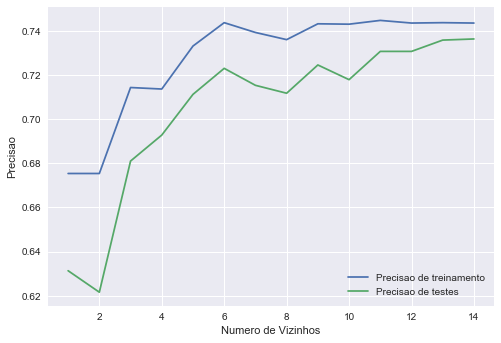

In [136]:
neighbors_settings = range(1, 15)
training_accuracy = []
test_accuracy = []

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Precisao de treinamento")
plt.plot(neighbors_settings, test_accuracy, label="Precisao de testes")
plt.ylabel("Precisao")
plt.xlabel("Numero de Vizinhos")
plt.legend()

plt.savefig('KNN Vizinhos.png')
plt.show()

## Cross validation

In [133]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, df[['genres','budget']], df['classe'])
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.71055662  0.69535152  0.69204152]
